## An exemple: insertion sort

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif" style="width:50%; float:center">

## Implementation of insertion sort on top of a numpy array

In [1]:
import numpy as np
def insertion_sort(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar.pop(i) # O(n - i)
            for insertion_index in range(len(ar)): # O(i)
                if key(ar[insertion_index]) >= key(el):
                    break
            ar.insert(insertion_index, el) # O(n - i)
        else:  
            previous = ar[i]
    return ar

# C = O(n) * ((2*O(n - i) + O(i))) = O(n²)

ar = list(np.random.randint(1, 100, 10))
print(ar)
insertion_sort(ar)

[np.int32(48), np.int32(31), np.int32(63), np.int32(31), np.int32(38), np.int32(73), np.int32(26), np.int32(34), np.int32(35), np.int32(96)]


[np.int32(26),
 np.int32(31),
 np.int32(31),
 np.int32(34),
 np.int32(35),
 np.int32(38),
 np.int32(48),
 np.int32(63),
 np.int32(73),
 np.int32(96)]

We are now plotting the complexity size of the container VS insertion sort time

100%|██████████| 100/100 [02:51<00:00,  1.72s/it]
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_18852\1391885466.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


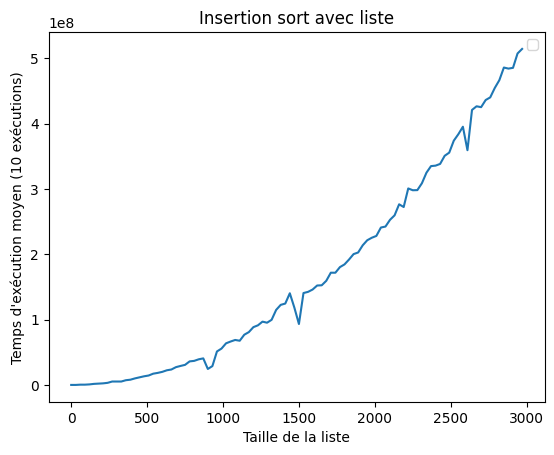

In [2]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 10
N = 3000
step = 30
times_v1 = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        insertion_sort(ar)
        times_v1[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1))
plt.xlabel("Taille de la liste")
plt.ylabel(f"Temps d'exécution moyen ({k} exécutions)")
plt.title('Insertion sort avec liste')
plt.legend()

## Python sorted function comparison

100%|██████████| 1000/1000 [00:28<00:00, 34.69it/s]


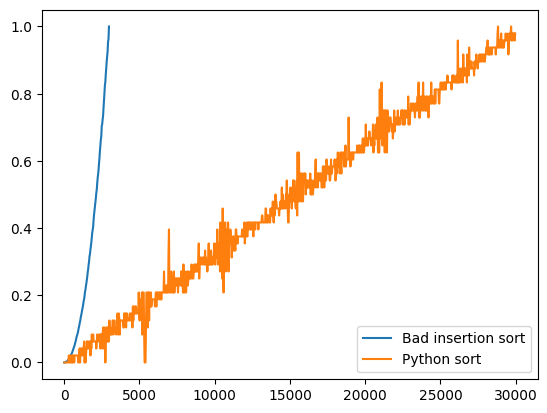

In [3]:
k = 10
N_default = 30000
step = 30
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1)/np.max(np.mean(times_v1, axis=1)), label="Bad insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1)/np.max(np.mean(times_default, axis=1)), label="Python sort")
plt.legend()

## Testing a merge k-sorted list algorithm  

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Loser_tree_merge.gif" style="width:50%; float:center">

In [4]:
from bisect import bisect_left

def insertion_sort3(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar[i]
            j = bisect_left(ar, el, lo=0, hi=i) # O(log(i))
            ar[j], ar[j+1:i+1] = el, ar[j:i] # O(i - j)
        else:
            previous = ar[i]
    return ar

# C = O(n²)

ar = list(np.random.randint(1, 100, 10))
insertion_sort3(ar)

[np.int32(4),
 np.int32(5),
 np.int32(26),
 np.int32(28),
 np.int32(40),
 np.int32(41),
 np.int32(54),
 np.int32(59),
 np.int32(64),
 np.int32(91)]

We compare with our previous implementation

In [5]:
ar = list(np.random.randint(1, 100, 1000))
%timeit insertion_sort(ar.copy())
%timeit insertion_sort3(ar.copy())

23.7 ms ± 70.8 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.5 ms ± 34.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


We now compare with previous results

100%|██████████| 100/100 [00:07<00:00, 12.54it/s]


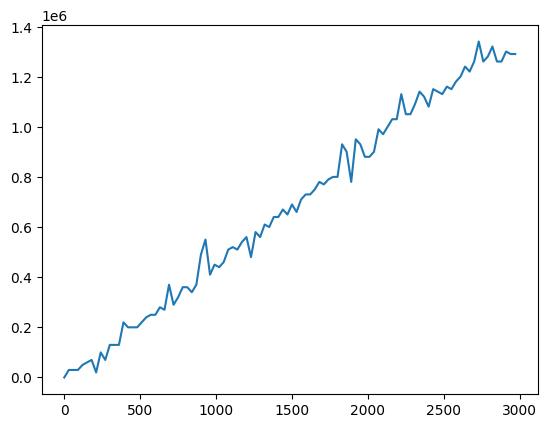

In [6]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 100
N = 3000
step = 30
n_errors = 10
times = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        insertion_sort3(ar)
        times[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times, axis=1))

100%|██████████| 1000/1000 [00:44<00:00, 22.71it/s]


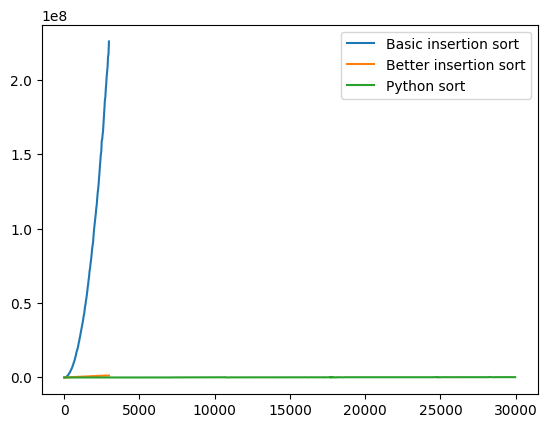

In [9]:
k = 100
N_default = 30000
step = 30
n_errors = 10
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0
        
plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
plt.plot(np.arange(N//step)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1), label="Python sort")
plt.legend()

Should we change the container ?

We try with a sorted dictionnary

100%|██████████| 1000/1000 [03:04<00:00,  5.43it/s]


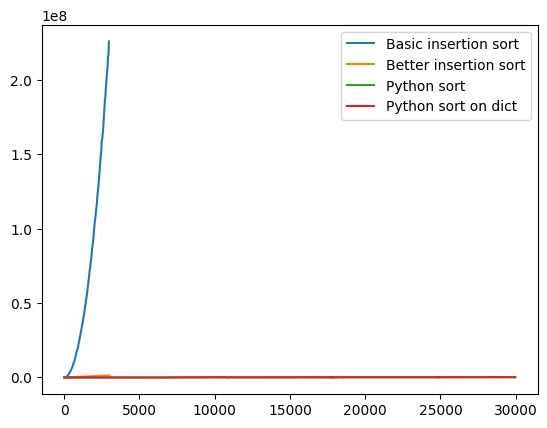

In [11]:
k = 100
N_default = 30000
step = 30
n_errors = 10
times_dict = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        res_dict = {ar[j] : ar[j] for j in range(i)}
        t0 = time_ns()
        sorted(res_dict)
        times_dict[i//step, j] = time_ns() - t0
        
plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
plt.plot(np.arange(N//step)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1), label="Python sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1), label="Python sort on dict")
plt.legend()